In [ ]:
#Membuat directory untuk kaggle.json  
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

#Memastikan kaggle.json benar
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

#Install kaggle
!pip install -q kaggle
!pip install -q kaggle-cli

#Download dataset
#!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized
!kaggle datasets download -d blastchar/telco-customer-churn

#Extract dataset
import zipfile
#zip_ref = zipfile.ZipFile('diabetic-retinopathy-resized.zip', 'r')
zip_ref = zipfile.ZipFile('telco-customer-churn.zip', 'r')
zip_ref.extractall()
zip_ref.close()

kaggle.json
total 4
-rw------- 1 root root 64 Jan 12 14:08 kaggle.json
     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 5.3MB 5.3MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 133kB 50.2MB/s 
     |████████████████████████████████| 112kB 55.1MB/s 
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 26.0MB/s]


# Data Science Project - Telco Customer Churn
*(Shidqie Taufiqurrahman - 2020)*

Hello everyone!

In this data science project, I am gonna try to analyze and predict churn customer from Telco Customer Churn dataset [1]. Churn is phenomenon where customers of a business no longer purchase or interact with the business. A high churn means that higher number of customers no longer want to purchase goods and services from the business.

Data Information:

* 7043 rows
* 21 columns with 19 features

Metadata:
* customerID: Customer ID
* gender: Whether the customer is a male or a female (Male, Female)
* SeniorCitizen: Whether the customer is a senior citizen or not (Yes, No)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has a multiple lines or not (Yes, No)
* InternetService: Customer’s internet service provider (Yes, No)
* OnlineSecurity: Whether the customer has a online security or not (Yes, No)
* DeviceProtection: Whether the customer has a device protection or not (Yes, No)
* OnlineBackup: Whether the customer has a online backup or not (Yes, No)
* StreamingMoies: Whether the customer has a streaming movies services or not (Yes, No)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No)
* TechSupport: Whether the customer has tech support or not (Yes, No)
* Contract: Customer's contract (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes, No)

# 1. Introduction

To extract actionable insights from the dataset. I listed all the questions that came to mind below after assessing the dataset, and I tried to investigate all of them to find the insights:

1. Does the demographic feature (gender, Senior Citizen, Partners, Dependents) have influence on the customers to churn?
2. Does the customer who churn using all of the services that telco gives?
3. For two groups of those customers who churn and not, how long did they usually stay in the service? and what was their average LTV(Life Time Value)?
4. Does expensive charges makes customers churn?


# 2. Data Preparation

Import Library and import data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'darkgrid')

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charges should be a numerical data type, not object

In [ ]:
# Converting Total Charges to a numerical data type
# Using pd.to_numeric to instantly change data type into float 64
# errors='coerce' to return missing value into NaN
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

Check if there are missing values

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in Total Charges column, we are going to just delete the data

In [ ]:
df.dropna(inplace=True)

Replace Churn column value into 0 and 1, and also make a df_dummies dataframe to understand the data better

In [ ]:
# Convert the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# 3. Data Visualization and Analysis

There are 27% customers who churn, and 73% who are not. The data is slightly imbalanced

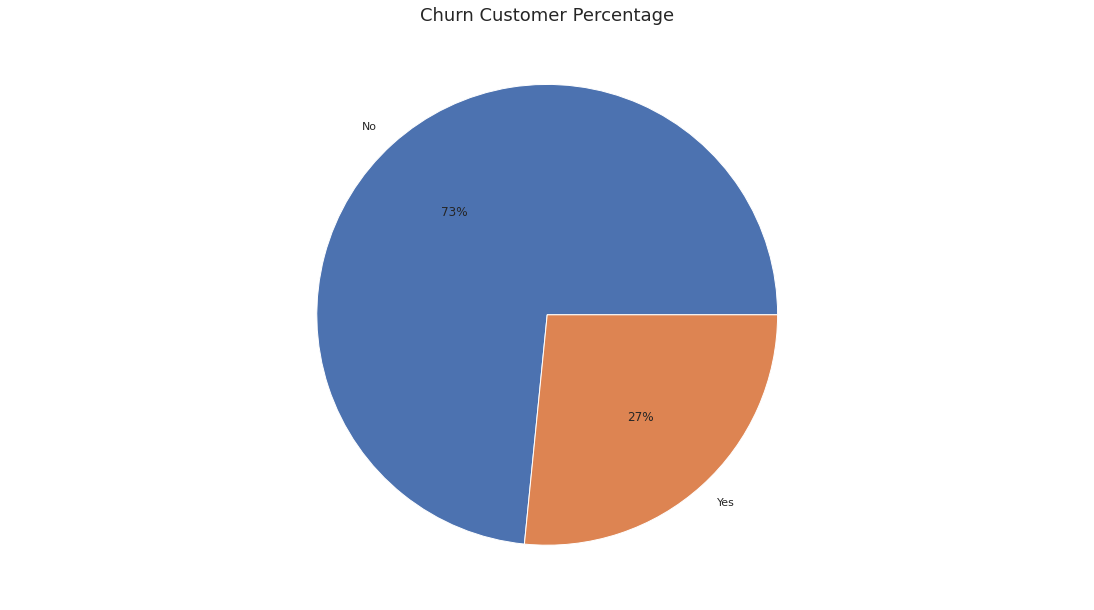

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No', 'Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels = labels, autopct = '%.0f%%')
plt.title('Churn Customer Percentage', fontsize=18)
plt.show()

## 1. Does the demographic feature (gender, Senior Citizen, Partners, Dependents) have influence on the customers to churn?

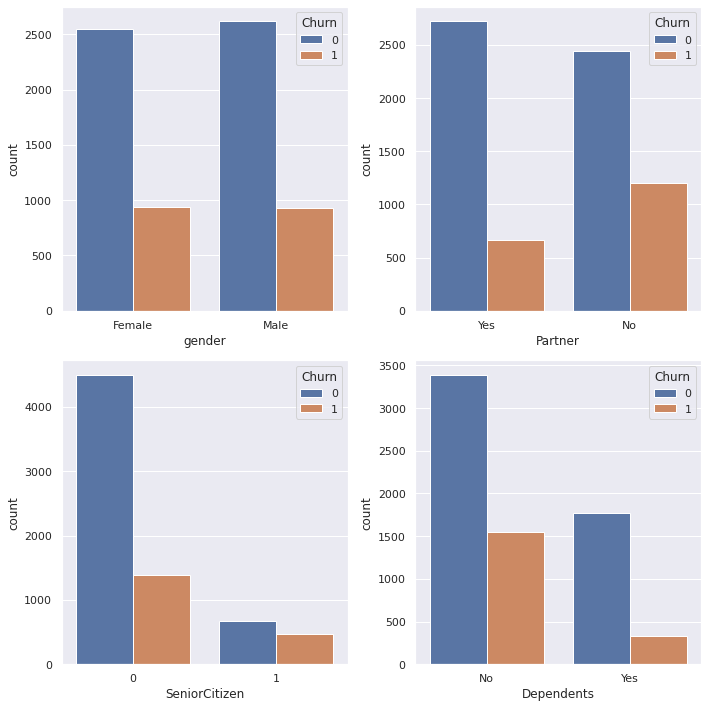

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
sns.countplot(data=df, x = 'gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x = 'Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x = 'SeniorCitizen', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x = 'Dependents', hue='Churn', ax=ax[1][1])
plt.tight_layout()
plt.show()

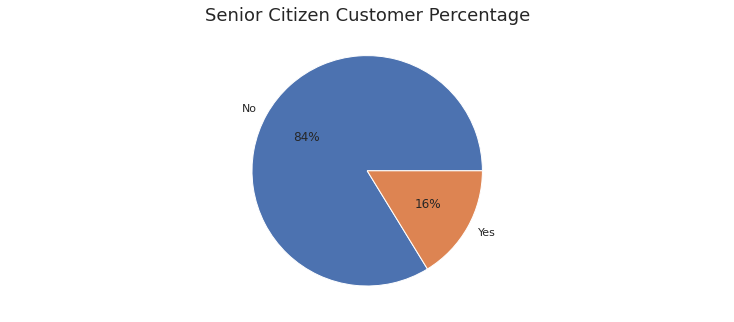

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No', 'Yes']
churn = df.SeniorCitizen.value_counts()
ax.pie(churn, labels = labels, autopct = '%.0f%%')
plt.title('Senior Citizen Customer Percentage', fontsize=18)
plt.show()

Insight: 
* Gender is not an indicative of churn
* Customers that doesn't have partners are more likely to churn
* SeniorCitizens are only 16% of customers, but they have a much higher churn rate
* Customers without dependents are also more likely to churn

## 2. Does the customer who churn using all of the services that telco company gives?

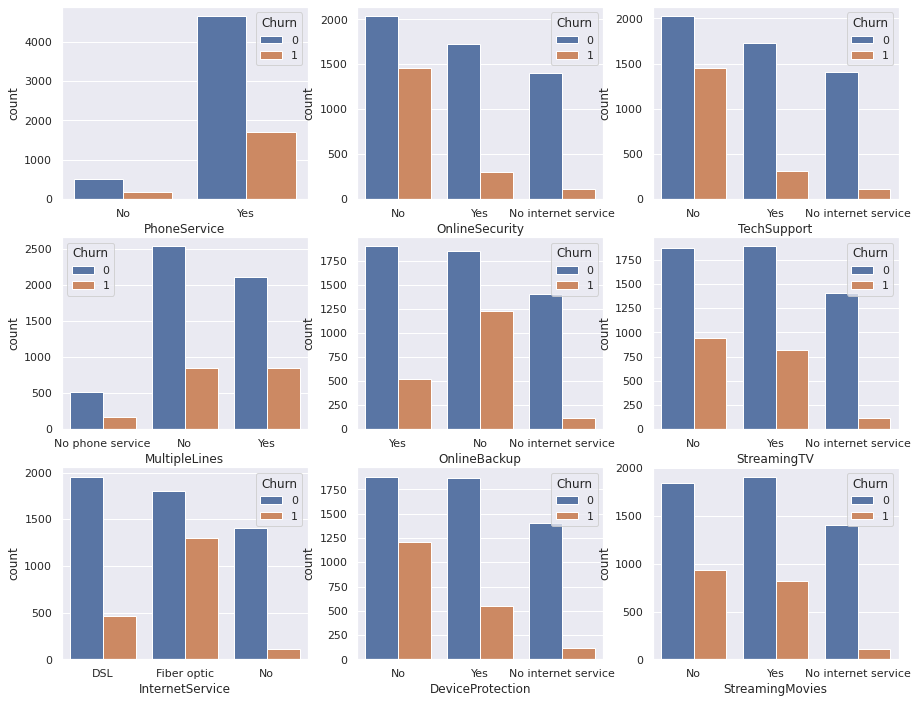

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, ax = plt.subplots( 3, 3, figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        sns.countplot(data=df, x = item, hue='Churn', ax=ax[i][0])
        
    elif i >=3 and i < 6:
        sns.countplot(data=df, x = item, hue='Churn', ax=ax[i-3][1])
        
    elif i < 9:
        sns.countplot(data=df, x = item, hue='Churn', ax=ax[i-6][2])

Insight: 
* Absence of services mostly seem to be positively correlated with churn (except phone service, multiple lines, streaming services and internet services)
* Streaming services is not an indicative for churn
* Customers with fiber optic internet service are more likely to churn
* Customers without phone services and internet services are more unlikely to churn

## 3. For those customers who churn, how long did they usually stay in the service?

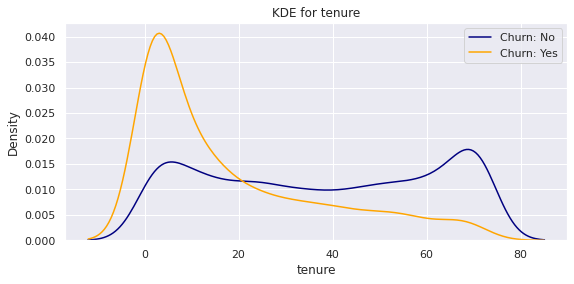

In [ ]:
plt.figure(figsize=(9, 4))
plt.title("KDE for tenure")
ax0 = sns.kdeplot(df[df['Churn'] == 0]['tenure'], color= 'navy', label= 'Churn: No', legend=True)
ax1 = sns.kdeplot(df[df['Churn'] == 1]['tenure'], color= 'orange', label= 'Churn: Yes', legend=True)
plt.legend()

In [ ]:
df.groupby('Churn')['tenure'].mean

Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

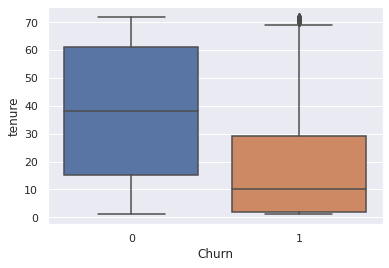

In [ ]:
sns.boxplot(x='Churn', y = 'tenure', data=df)

Insight:
* Recent clients are more likely to churn
* Customers that churn have 18-month tenure on average, and those who doesn't, have higher average which is 37-month
* There are some outliers, that is customers that churn but also have stayed in the company for a long time

## 4. Does expensive charges makes customers churn?

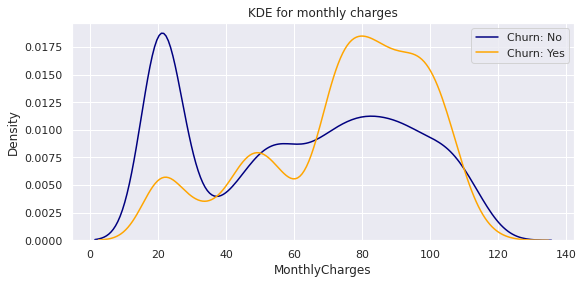

In [ ]:
plt.figure(figsize=(9, 4))
plt.title("KDE for monthly charges")
ax0 = sns.kdeplot(df[df['Churn'] == 0]['MonthlyCharges'], color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(df[df['Churn'] == 1]['MonthlyCharges'], color= 'orange', label= 'Churn: Yes')
plt.legend()

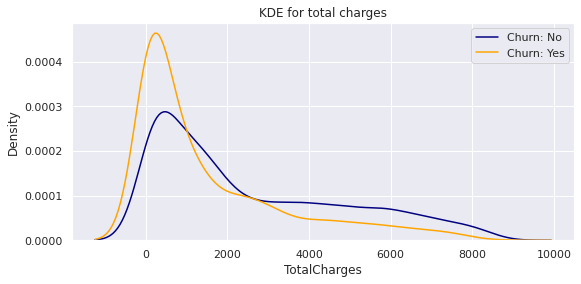

In [ ]:
plt.figure(figsize=(9, 4))
plt.title("KDE for total charges")
ax0 = sns.kdeplot(df[df['Churn'] == 0]['TotalCharges'], color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(df[df['Churn'] == 1]['TotalCharges'], color= 'orange', label= 'Churn: Yes')
plt.legend()

Insight:
* Clients with higher Monthly Charges are also more likely to churn
* Total charges is not indicative of churn

## 5. Does contract type and payment method feature have influence on the customer to churn?

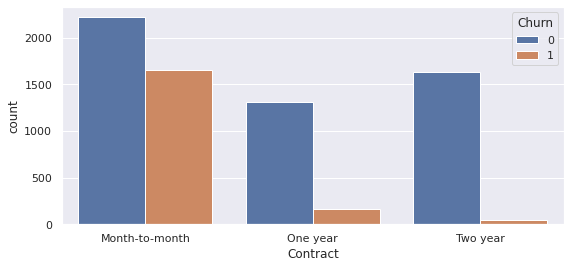

In [ ]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x = 'Contract', hue='Churn')

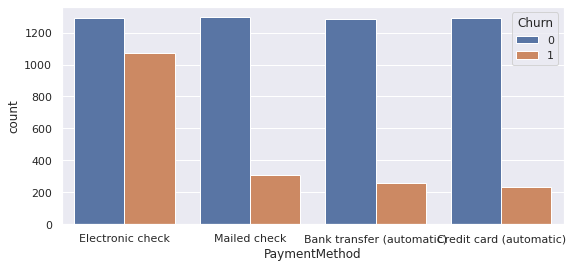

In [ ]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x = 'PaymentMethod', hue='Churn')

In [ ]:
print('Customers that use Electronic Check as their payment method is about {}%'.format(((df['PaymentMethod'] == 'Electronic check').sum()/len(df))*100))

Customers that use Electronic Check as their payment method is about 33.63196814562002%


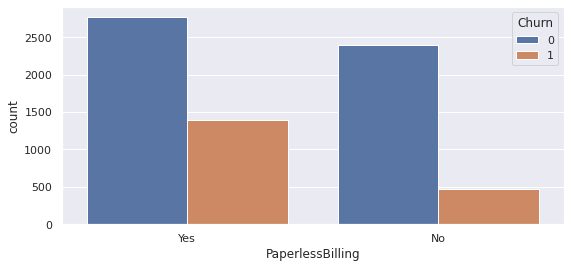

In [ ]:
plt.figure(figsize=(9, 4))
sns.countplot(data=df, x = 'PaperlessBilling', hue='Churn')

Insight:
* Short term contracts have higher churn rates
* The preferred payment method is Electronic check. This method also has a very high churn rate
* Customers with paperless billing are more probable to churn

## 6. Summary

Using Pandas corr() function to see the correlation of the features

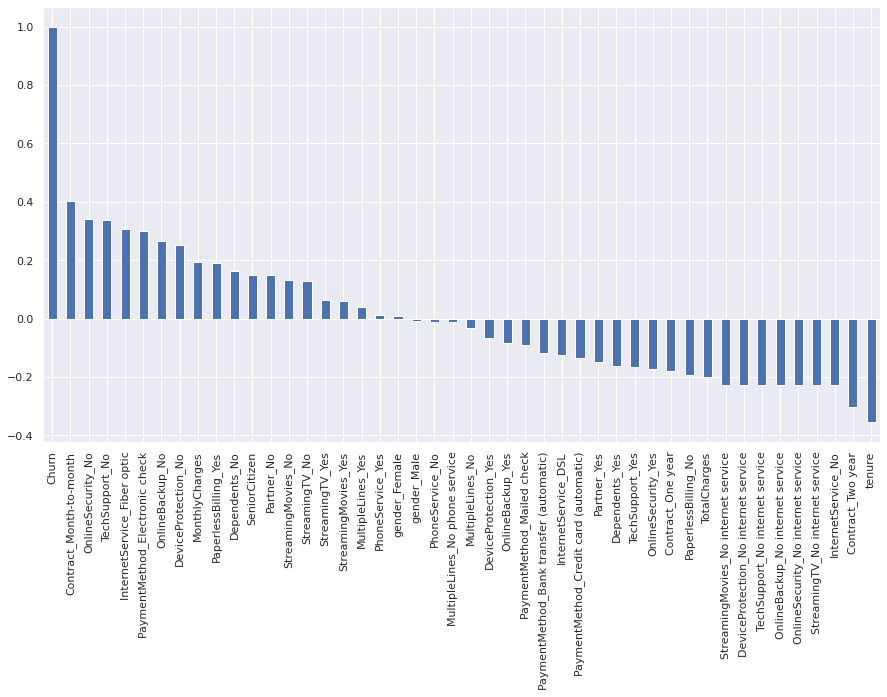

In [ ]:
# Convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df.iloc[:,1:])
df_dummies.head()

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The features that have high correlation with the churn is the same as what i analyzed

Reccomendation: 
1

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.8113744075829384


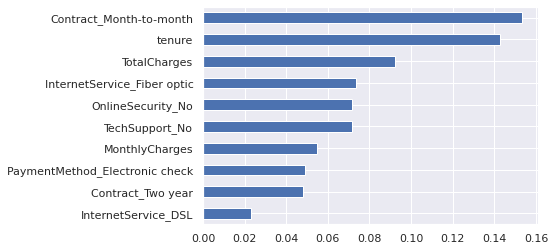

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

[1] https://www.kaggle.com/blastchar/telco-customer-churn/
